# <span style="color:blue">Flight Price Prediction</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Importing dataset**

1.since dataset is in the form of excel file we have to use pandas read_excel to load dataset.

2.After loading it is important to check complete information of dataset as it can indicate many hidden information such as null values in columns or row.

3.check whether null values are there or not. if it is present following can be done:
    
    1.Imputing data using imputation method in sklearn.
    2.Filling NaN values using mean,median,mode with fillna() method.

4.Describe data --> which gives statistical analysis.


In [2]:
train_data=pd.read_excel("D:\FlightPricePrediction\Data_Train.xlsx")
pd.set_option("display.max_columns", None)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data.dropna(inplace=True)

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.shape

(10682, 11)

In [8]:
train_data["Duration"].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [9]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

**Exploratory Data Analysis:**

From the description we noticed that Date_of_Journey column is an object datatype.

Therefore, we have to convert this datatype to timestamp so as to use this column properly for prediction.

for this we required pandas **to_datatime** to convert object datatype to datatime datatype.

**<span style="color:Red">.dt.day method will extract only the day of that date.</span>**

**<span style="color:Red">.dt.month method will extract only the month of that date.</span>**

In [10]:
train_data["Journey_day"]= pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.day
train_data["Journey_month"]=pd.to_datetime(train_data["Date_of_Journey"] ,format = "%d/%m/%Y").dt.month
train_data["Journey_Year"]=pd.to_datetime(train_data["Date_of_Journey"] ,format = "%d/%m/%Y").dt.year
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [11]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
train_data.drop("Date_of_Journey",axis=1,inplace=True)

In [12]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_Year'],
      dtype='object')

In [13]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

#Extracting hour
train_data["Dep_hour"]= pd.to_datetime(train_data["Dep_Time"], format ="%H:%M").dt.hour

#Extracting minutes
train_data["Dep_minutes"]=pd.to_datetime(train_data["Dep_Time"],format = "%H:%M").dt.minute

train_data.drop(["Dep_Time"],axis=1,inplace=True)

In [14]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Year,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [15]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

train_data.head()


C:\Users\ACER\AppData\Local\Temp\ipykernel_2832\3557933035.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_hour"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour
C:\Users\ACER\AppData\Local\Temp\ipykernel_2832\3557933035.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_min"] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [16]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time

# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i]= duration[i].strip() + " 0m"  # Adds 0 minute
        else:
            duration[i]= "0h " + duration[i]  # Adds 0 hours

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [17]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


**Handling Categorical Data**

One can find many ways to handle categorical data. Some of them categorical data are:

1.<span style="color:blue">**Nominal data**</span> --> data is not in order --> in this case we use <span style="color:green"> **OneHotEncoding**.</span>

2.<span style="color:blue">**ordinal data**</span> --> data is in order --> in this case we use <span style="color:green">**LabelEncoding**.</span>

In [18]:
train_data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

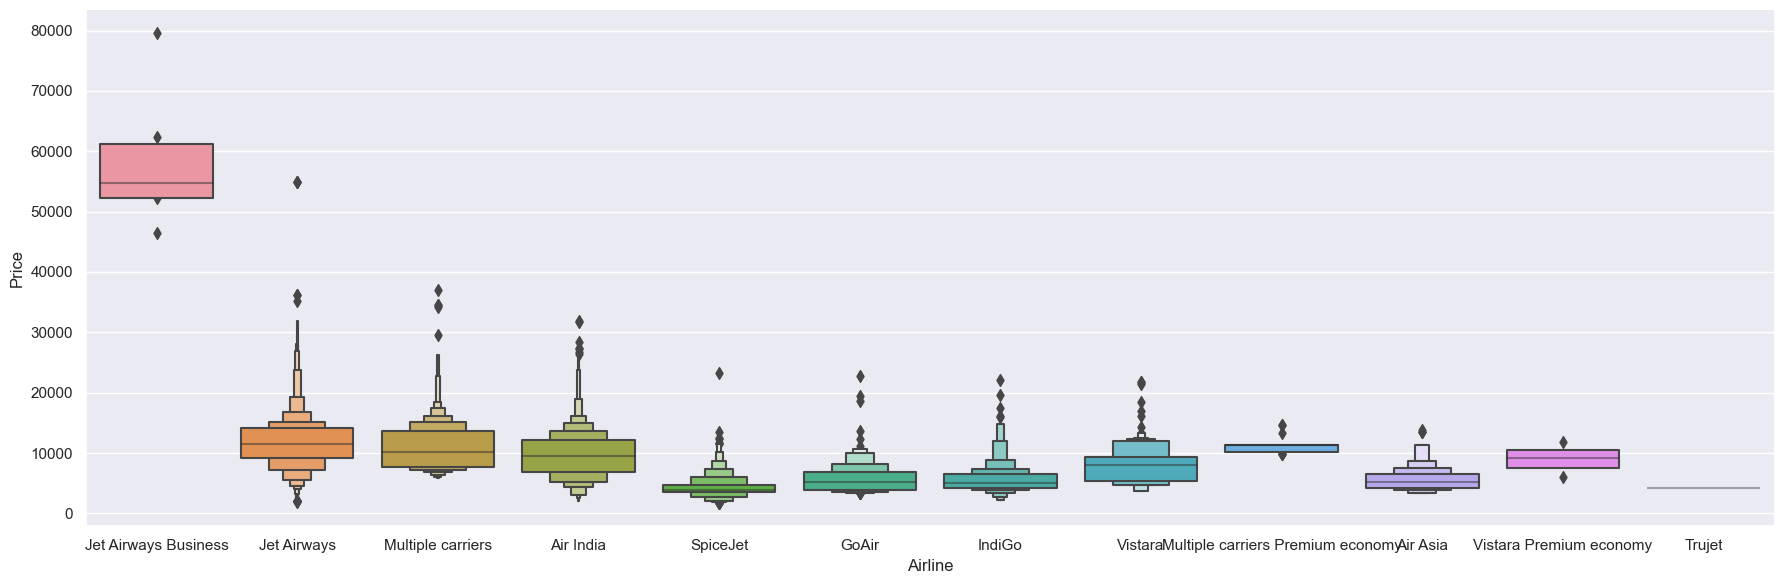

In [19]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median 

# Airline vs Price
sns.catplot(y="Price",x="Airline",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [20]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline= train_data[["Airline"]]
Airline=pd.get_dummies(Airline, drop_first=True,dtype= int)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [21]:
train_data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

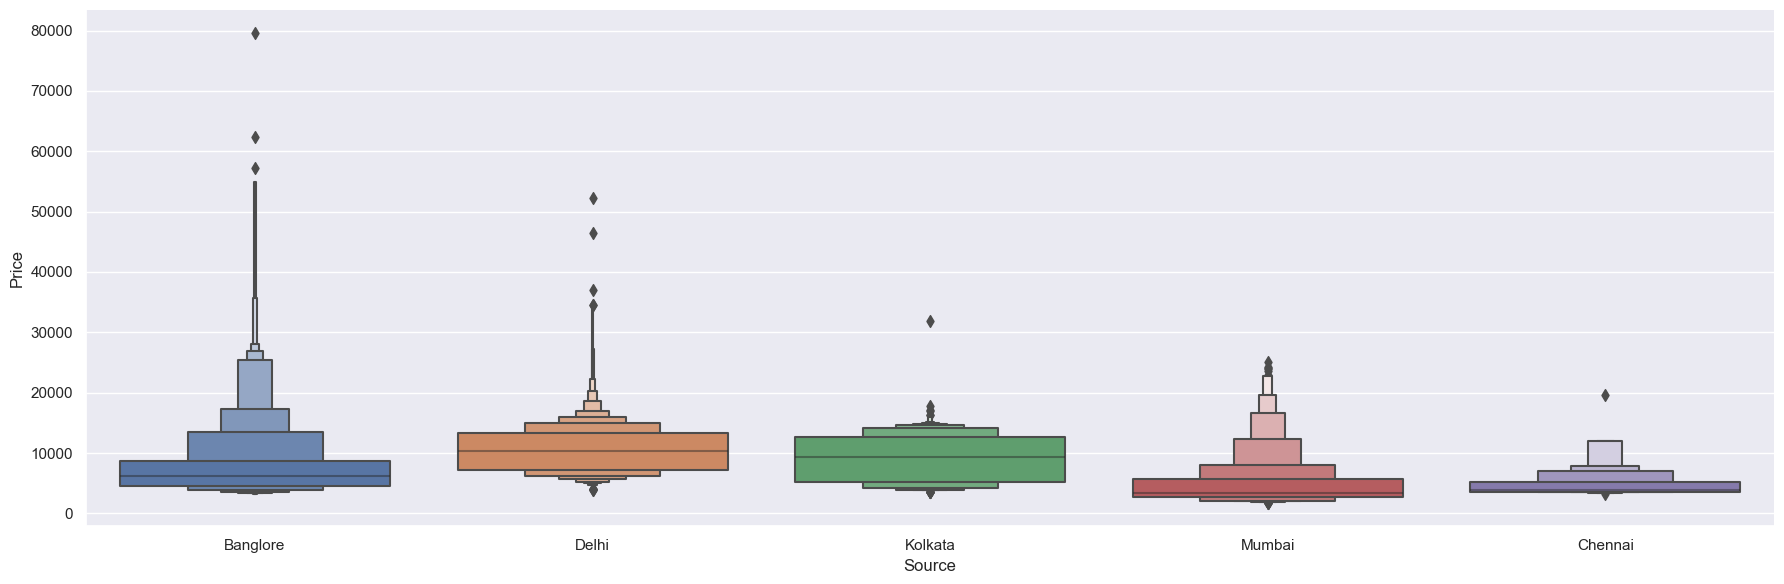

In [22]:
#source vs price
sns.catplot(y="Price",x="Source",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [23]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source=train_data[["Source"]]
Source=pd.get_dummies(Source,drop_first=True,dtype=int)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [24]:
train_data["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

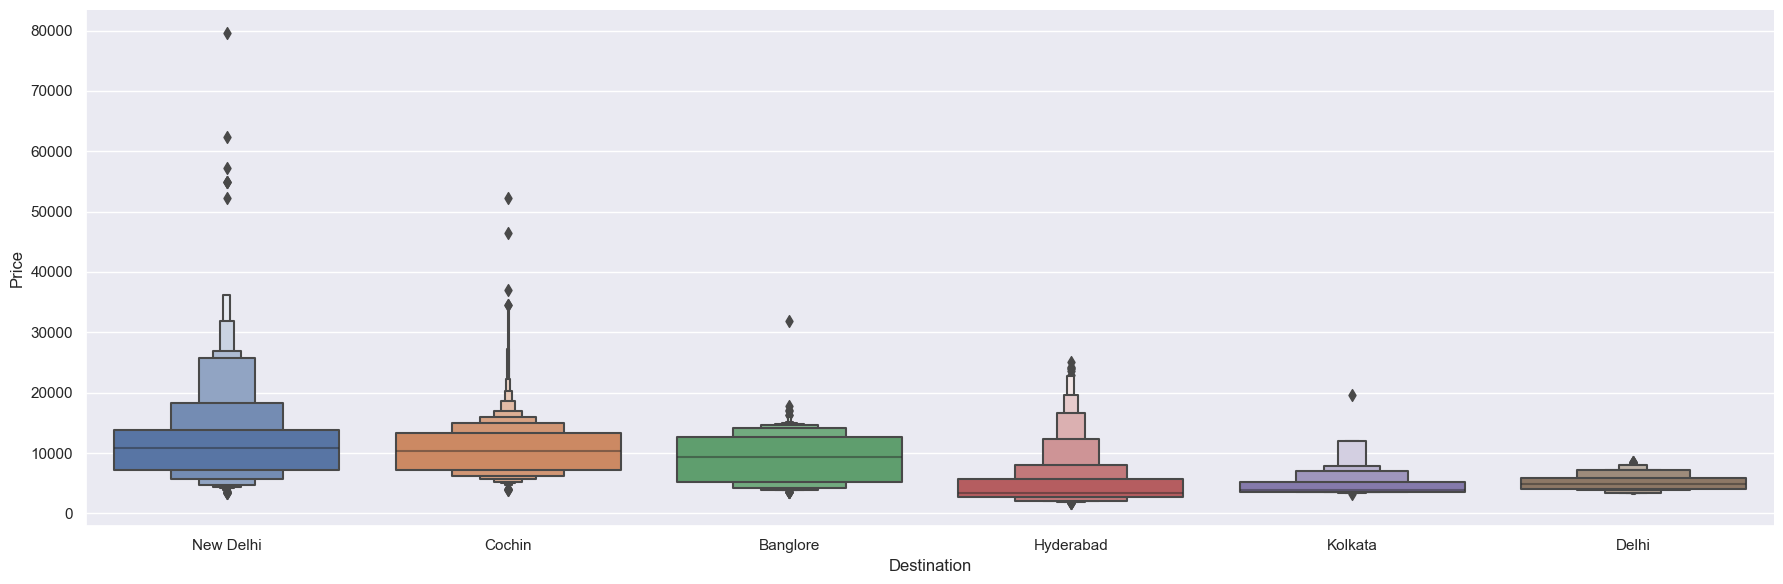

In [25]:
#Destination vs price
sns.catplot(x="Destination",y="Price",data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [26]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination=train_data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True,dtype=int)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [27]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
train_data.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [28]:
train_data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [29]:
train_data.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [30]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,2019,16,50,21,35,4,45


In [31]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
data_train=pd.concat([train_data,Airline,Source,Destination],axis=1)
data_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)
data_train.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Journey_Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2h 50m,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,7h 25m,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,19h,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,5h 25m,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4h 45m,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [33]:
data_train.drop(["Journey_Year"],axis=1,inplace=True)
data_train.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2h 50m,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,7h 25m,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,19h,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,5h 25m,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4h 45m,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [34]:
data_train.shape

(10682, 31)

# Test set

In [35]:
test_data=pd.read_excel("D:\FlightPricePrediction\Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [36]:
# Preprocessing

print("Test Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null Values")
print("-"*75)
print(test_data.dropna(inplace=True))
print(test_data.isnull().sum())  

Test Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null Values
---------------------------------------------------------------------------
None
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           

In [37]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [38]:
#EDA

#Date_of_Journey
test_data["Journey_day"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.day
test_data["Journey_month"]=pd.to_datetime(test_data["Date_of_Journey"],format="%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"],axis=1,inplace=True)

#Dep_Time
test_data["Dep_hour"]=pd.to_datetime(test_data["Dep_Time"],format ="%H:%M").dt.hour
test_data["Dep_minute"]=pd.to_datetime(test_data["Dep_Time"],format="%H:%M").dt.minute
test_data.drop(["Dep_Time"],axis=1,inplace=True)

#Arrival_Time
test_data["Arrival_hour"]=pd.to_datetime(test_data["Arrival_Time"]).dt.hour
test_data["Arrival_minute"]=pd.to_datetime(test_data["Arrival_Time"]).dt.minute
test_data.drop(["Arrival_Time"],axis=1,inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_2832\123340003.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_hour"]=pd.to_datetime(test_data["Arrival_Time"]).dt.hour
C:\Users\ACER\AppData\Local\Temp\ipykernel_2832\123340003.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_minute"]=pd.to_datetime(test_data["Arrival_Time"]).dt.minute


In [39]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [40]:
test_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,4h,1 stop,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,23h 45m,1 stop,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,13h,1 stop,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,2h 50m,non-stop,24,6,23,55,2,45


In [41]:
# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True,dtype=int)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True,dtype=int)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True,dtype=int)


# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Airline
---------------------------------------------------------------------------
Airline
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: count, dtype: int64

Source
---------------------------------------------------------------------------
Source
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: count, dtype: int64

Destination
---------------------------------------------------------------------------
Destination
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: count, dtype: 

In [42]:
data_test.head()

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,10h 55m,1,6,6,17,30,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,4h,1,12,5,6,20,10,20,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,23h 45m,1,21,5,19,15,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,13h,1,21,5,8,0,21,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,2h 50m,0,24,6,23,55,2,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# <span style="color:blue"> Feature Selection </span>

*Finding out the best feature which will contribute and have good relation with the target variable. Some of the feature selection method:*

1.<span style="color:red"> **HeatMap** </span>

2.<span style="color:red"> **Feature_importance_** </span>

3.<span style="color:red"> **SelectKBest** </span>

In [43]:
data_train.shape

(10682, 31)

In [44]:
data_train.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2h 50m,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,7h 25m,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,19h,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,5h 25m,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4h 45m,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
data_train.columns

Index(['Duration', 'Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Dep_hour', 'Dep_minutes', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [75]:
data_train.shape

(10682, 31)

In [46]:
X=data_train.loc[:,['Total_Stops','Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [76]:
y=data_train.iloc[:,2]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [77]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (30,30))
sns.heatmap(data=data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

ValueError: could not convert string to float: '2h 50m'

<Figure size 3000x3000 with 0 Axes>

In [78]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [79]:
print(selection.feature_importances_)

[2.25127375e-01 1.43821261e-01 5.32417180e-02 2.37553463e-02
 2.11836308e-02 2.80898132e-02 1.87158231e-02 1.16820787e-01
 1.79960126e-02 1.15355143e-02 1.67229315e-03 1.62077867e-02
 1.46200006e-01 6.78003526e-02 2.02228140e-02 8.74341614e-04
 2.80845520e-03 1.10979011e-04 5.20396239e-03 8.14610603e-05
 6.02080806e-04 9.98481201e-03 3.25480345e-03 5.92465176e-03
 1.11002867e-02 1.36117067e-02 8.70636916e-03 5.40782716e-04
 2.48047727e-02]


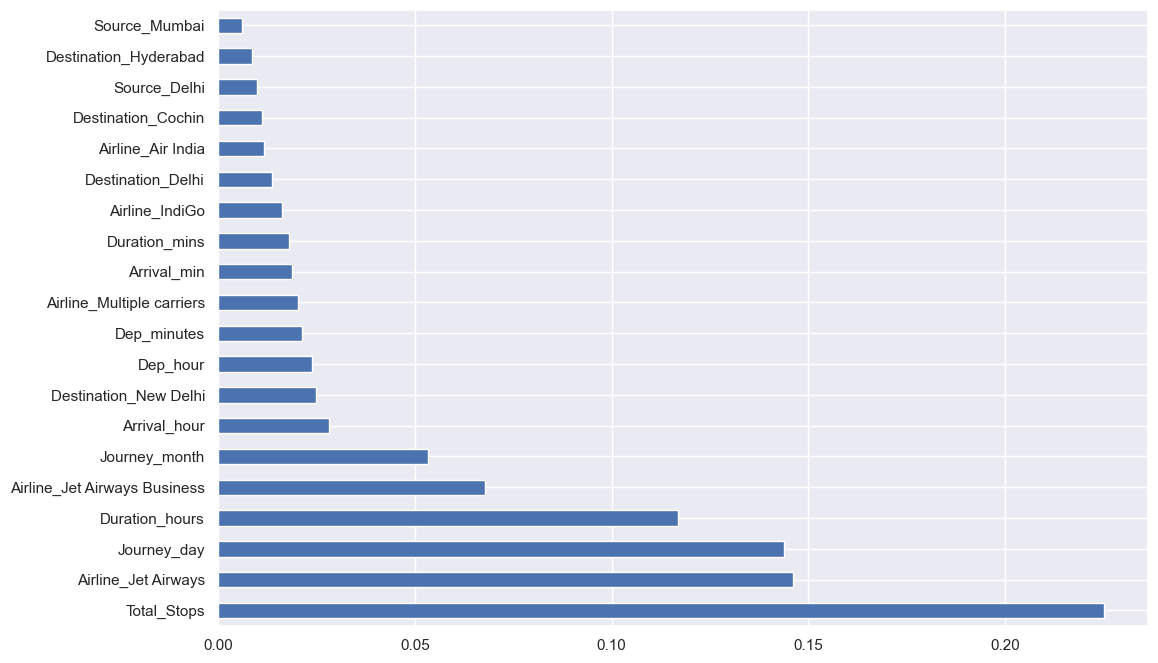

In [80]:
plt.figure(figsize=(12,8))
feature_importance= pd.Series(data= selection.feature_importances_, index= X.columns)
feature_importance.nlargest(20).plot(kind="barh")
plt.show()

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [82]:
ordered_rank_feature =  SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_feature.fit(X,y)
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x000001485BDDC160>)

In [83]:
ordered_feature.scores_

array([ 5780.6511269 , 22598.8624925 ,  2437.61643993, 11058.30699957,
       68390.2755877 , 18959.28305045, 50443.54934164, 58838.74318201,
       44466.48981875,  8671.13442353,  9370.15134061,  7889.34544254,
        6739.05976585, 10676.        ,  9287.55420071, 10669.        ,
        8665.56742221, 10681.        , 10065.86080218, 10679.        ,
       10076.96779858,  6021.99308417,  7632.76076868,  9779.55865756,
        6021.99308417,  8985.44352475,  9779.55865756, 10076.96779858,
        9049.37783233])

In [84]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [85]:
feature_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [86]:
feature_rank.columns=["Feature","Score"]
feature_rank.nlargest(20,"Score")

,Feature,Score
4,Dep_minutes,68390.275588
7,Duration_hours,58838.743182
6,Arrival_min,50443.549342
8,Duration_mins,44466.489819
1,Journey_day,22598.862492
5,Arrival_hour,18959.283050
3,Dep_hour,11058.307000
17,Airline_Trujet,10681.000000
19,Airline_Vistara Premium economy,10679.000000
13,Airline_Jet Airways Business,10676.000000


# Fitting model using Random Forest

1.split the data in train and test inorder to predict wrt to X_test.<br>
2.if need do scaling of data.<br>
- But in case of random Forest scaling is not required.<br>

3.import the model.<br>
4.fit the data in model.<br>
5.predict wrt to X_test.<br>
6.In regression check **RSME** Score<br>
7.Plot graph.<br>

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [88]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X,y)

RandomForestRegressor()

In [89]:
y_pred=reg_rf.predict(X_test)

In [90]:
reg_rf.score(X_train,y_train)

0.9491124131843389

In [91]:
reg_rf.score(X_test,y_test)

0.9474790164393179

C:\Users\ACER\AppData\Local\Temp\ipykernel_2832\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


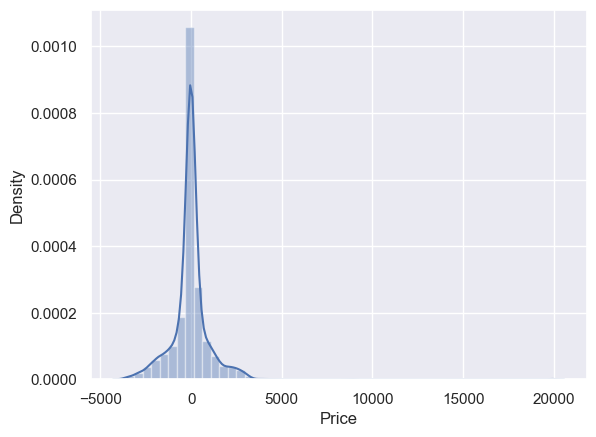

In [92]:
sns.distplot(y_test-y_pred)
plt.show()

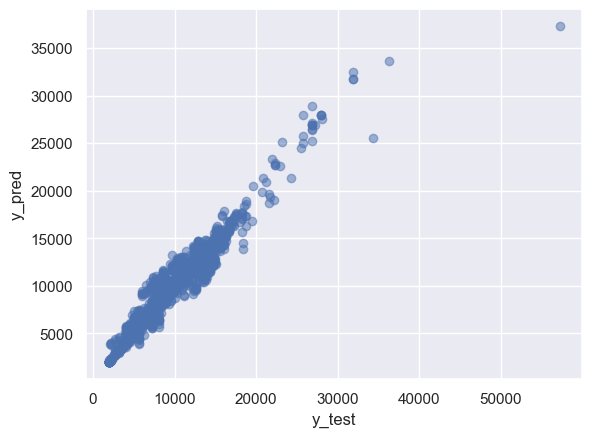

In [94]:
plt.scatter(y_test,y_pred,alpha= 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [95]:
from sklearn import metrics

In [96]:
print("MAE :" ,metrics.mean_absolute_error(y_test,y_pred))
print("MSE :" ,metrics.mean_squared_error(y_test,y_pred))
print("RMSE :" ,np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE : 596.8277212818507
MSE : 1132460.4057358026
RMSE : 1064.1712295189166


In [97]:
# RMSE/(max(DV)-min(DV))
1064.1712295189166/(max(y)-min(y))

0.013686561669889477

In [98]:
metrics.r2_score(y_test,y_pred)

0.9474790164393179

# Hyperparameter Tuning

- choose following method for Hyperparameter tunning:
    1. RandomizedSearchCV ---> fast
    2. GridSearchCV
- Assign hyperparameter tunning in the form of dictionary.
- Fit the model.
- check best parameters and score.

In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [ int(x) for x in np.linspace( start= 100, stop=1200,num = 12)]

# Number of features to consider at every split
max_features = ["auto","sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30 , num=6)]

# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [101]:
# Create the random grid

random_grid = {"n_estimators":n_estimators ,
               "max_features":max_features,
               "max_depth" : max_depth,
               "min_samples_split": min_samples_split,
               "min_samples_leaf" : min_samples_leaf
              }

In [105]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

rf_random= RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,scoring= "neg_mean_squared_error",n_iter=10, verbose = 2 , cv= 5 , random_state= 42 , n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ACER\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_pa

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [106]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [107]:
prediction = rf_random.predict(X_test)

C:\Users\ACER\AppData\Local\Temp\ipykernel_2832\3354484248.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


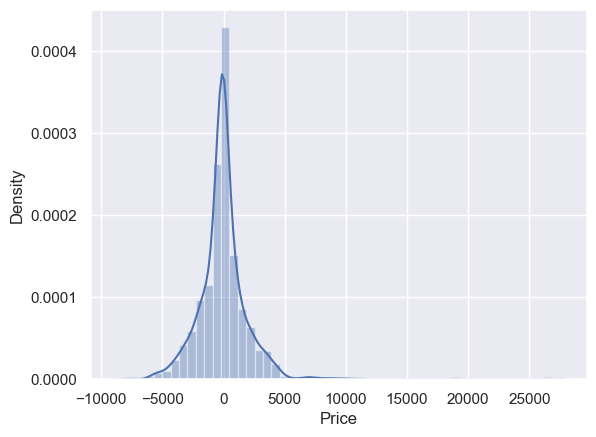

In [108]:
sns.distplot(y_test-prediction)
plt.show()

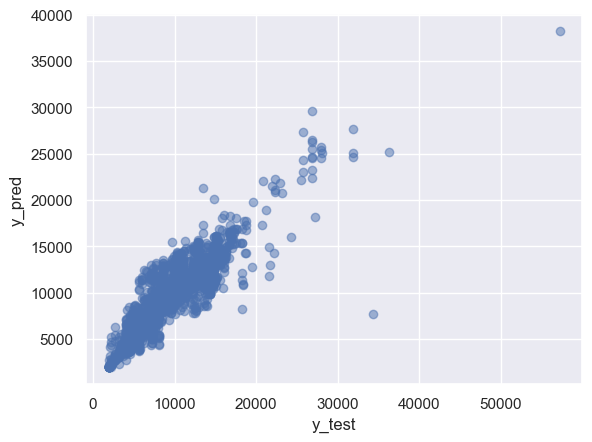

In [109]:
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [110]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1260.247198908773
MSE: 3878761.5143926563
RMSE: 1969.4571623654717


# Save the model to reuse it again

In [111]:
import pickle

In [118]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [119]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [120]:
y_prediction = forest.predict(X_test)

In [121]:
metrics.r2_score(y_test, y_prediction)

0.9474790164393179